**EXP #8 | Raghad Afaghani 1192423**





---



In [ ]:
pip install opencv-python


In [ ]:
wget https://www.birzeit.edu/sites/default/files/buildings.jpg


SyntaxError: invalid syntax (<ipython-input-2-162f8b255fcb>, line 1)

***Loading and displaying an image***

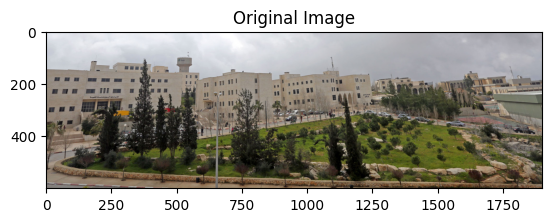

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load an image
image = cv.imread('/content/buildings.jpg')

# Display the image
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()



***Task 1***  What is the shape of the loaded image? What does each dimension represent?

In [ ]:
import cv2 as cv

# Load an image
image = cv.imread('/content/buildings.jpg')

# Get the shape of the image
height, width, channels = image.shape

print(f"Image Shape: {height} (height) x {width} (width) x {channels} (channels)")


Image Shape: 600 (height) x 1900 (width) x 3 (channels)


***Task 2*** repeat the previous code but now pass the image directly to plt.imshow().
I.e., without using cv.cvtColor(). Do you notice any difference? Why?

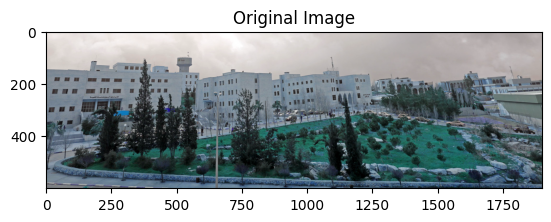

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load an image
image = cv.imread('/content/buildings.jpg')

# Display the image without using cv.cvtColor()
plt.imshow(image)
plt.title('Original Image')
plt.show()


***Grayscale conversion***

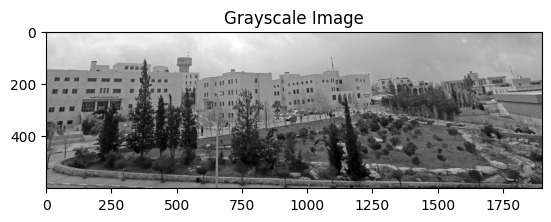

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

# Convert the image to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()


 cvtColor() function using which we are going to change the color space of a given image to different color space

***Task 3*** : What is the shape of the gray image? What does each dimension represent?

In [ ]:
import cv2 as cv

# Convert the image to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Get the shape of the image
height, width, channels = image.shape

print(f"Image Shape: {height} (height) x {width} (width) x {channels} (channels)")



Image Shape: 600 (height) x 1900 (width) x 3 (channels)


***Image transformation***

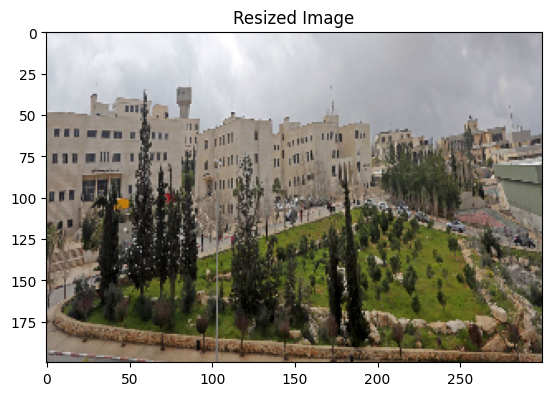

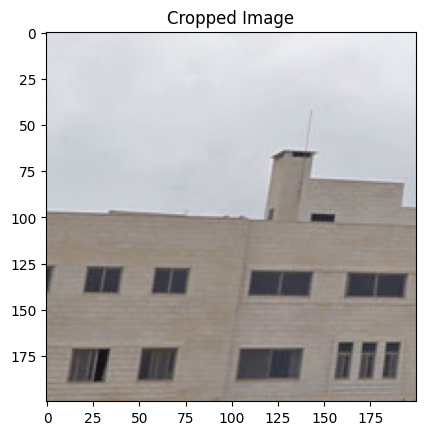

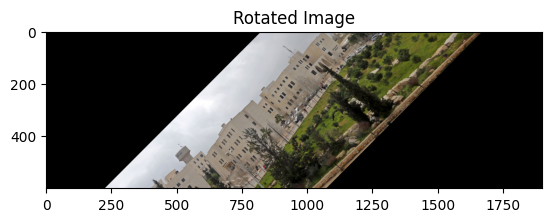

In [ ]:
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
# Resize and crop the image
resized_image = cv.resize(image, (300, 200))
cropped_image = image[50:250, 50:250]
# Rotate the image
rows, cols = image.shape[:2]
M = cv.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
rotated_image = cv.warpAffine(image, M, (cols, rows))
# Display the transformed images
plt.imshow(resized_image)
plt.title('Resized Image')
plt.show()
plt.imshow(cropped_image)
plt.title('Cropped Image')
plt.show()
plt.imshow(rotated_image)
plt.title('Rotated Image')
plt.show()

***Task 4***  Rotate the original image by 10 degrees counter-clockwise around the upperleft corner of the image.

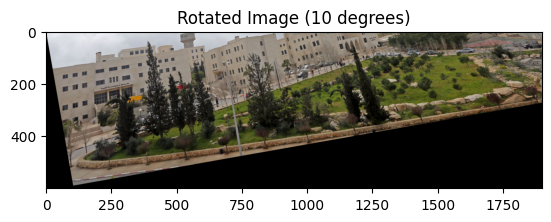

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load an image
image = cv.imread('/content/buildings.jpg')

# Get the image dimensions
rows, cols, _ = image.shape

# Define the rotation angle
angle = 10

# Calculate the rotation matrix
M = cv.getRotationMatrix2D((0, 0), angle, 1)

# Rotate the image
rotated_image = cv.warpAffine(image, M, (cols, rows)) #helps make chanes on orignail image

# Display the rotated image
plt.imshow(cv.cvtColor(rotated_image, cv.COLOR_BGR2RGB))
plt.title('Rotated Image (10 degrees)')
plt.show()


***Gaussian blurring***

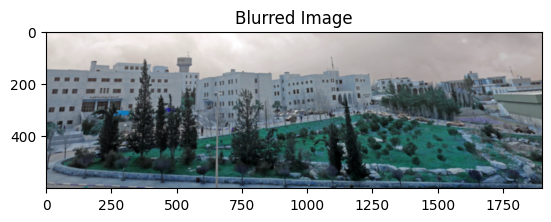

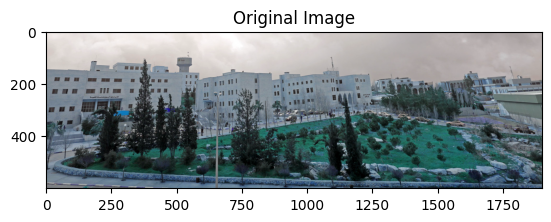

In [ ]:
# Apply Gaussian blur
blurred_image = cv.GaussianBlur(image, (7, 7), 0)
# Display the result
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.show()
plt.imshow(image)
plt.title('Original Image')
plt.show()


***Edge detection***

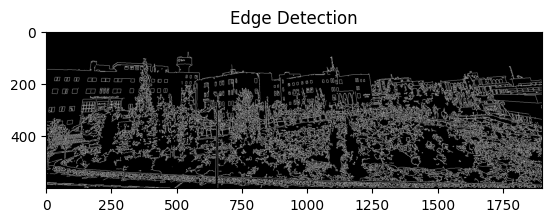

In [ ]:
# Perform edge detection using Canny
edges = cv.Canny(gray_image, 50, 150)
# Display the result
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.show()

***Task 6*** : Explain the parameters of cv.Canny(). How do they affect the results?

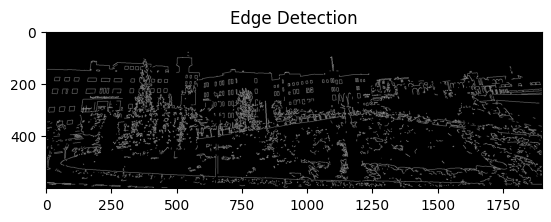

In [ ]:
# Perform edge detection using Canny
edges = cv.Canny(gray_image, 200, 300) #the noises effectes reduced
# Display the result
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.show()

**1.2.1 Image classification with MLP**

***Loading images***

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
[transforms.ToTensor(),
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 4 # it determines how many images are processed together in each batch during training and testing
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:13<00:00, 13092447.73it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


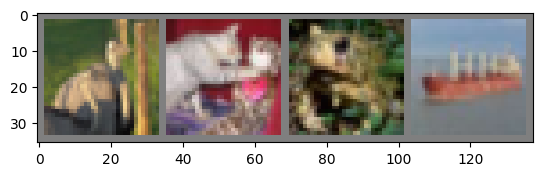

bird  cat   frog  ship 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) #number of axis
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


Task 7: Explain the effect of the following transforms transforms.ToTensor(), and
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)).


Task 8: What is the purpose of the following line: np.transpose(npimg, (1, 2, 0))?


***Task 7: Explanation of Transforms***

**transforms.ToTensor()** :
To changes the format of the images so they can be used by PyTorch.
It also adjusts the colors of the images so that instead of being between 0 and 255 (which is common for images), they are between 0 and 1.

=====
**transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))**
This function is useful for ensuring that the data is in a consistent format before training a neural network.


***Task 8: Purpose of np.transpose(npimg, (1, 2, 0))***


The np.transpose() function transposes a numpy array. In this case, we are transposing the array so that the first dimension is the height, the second dimension is the width, and the third dimension is the number of channels. This is the format that is expected by PyTorch.

***Defining the network***

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3072, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # Apply the first layer with relu activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)
net.to(device)


cuda:0


Net(
  (fc1): Linear(in_features=3072, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

***Define a Loss function and optimizer***

In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss() #loss function
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) #opitmizor with learning rate 0.01


***Train the network***

In [ ]:
net.train()
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(torch.flatten(inputs, 1))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 1.947
[1,  4000] loss: 1.731
[1,  6000] loss: 1.662
[1,  8000] loss: 1.646
[1, 10000] loss: 1.606
[1, 12000] loss: 1.576
[2,  2000] loss: 1.524
[2,  4000] loss: 1.516
[2,  6000] loss: 1.496
[2,  8000] loss: 1.480
[2, 10000] loss: 1.477
[2, 12000] loss: 1.476
Finished Training


***Test the network on the test data***

In [ ]:
correct = 0
total = 0

# Since we're not training, we don't need to calculate the gradients for our outputs
net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        # Calculate outputs by running images through the network
        outputs = net(torch.flatten(images, 1))

        # The class with the highest energy is what we choose as a prediction
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


Accuracy of the network on the 10000 test images: 47 %


**Task 9: For the first layer in the MLP (self.fc1 = nn.Linear(3072, 64) ), what does
the number 3072 represent?**


 the input dimension of the first layer

***1.2.2 Image classification with CNNs***

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class NetCNN(nn.Module):
    def __init__(self):
        super(NetCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        #Parameter	Description
#kernel_size:	Size of the max pooling kernel
#stride:	Step size for the max pooling operation
#padding:	Amount of padding to apply to the input tensor

        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # nn.Linear(in_features, out_features, bias=True)
        #channels,high,width,output

        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)  # Flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = NetCNN()
net = net.to(device)


**Task 10: Study the CNN code and answer the following questions:
- How many layers does the network have?
- What does the parameters of nn.Conv2d represent?
- What does the parameters of nn.MaxPool2d represent?
- In the first linear layer, what does the number 16 * 5 * 5 represent? How to obtain
this number?**

**1.2.3 Transfer Learning**

***Finetuning the ConvNet***

In [ ]:
from torchvision import datasets, models
net = models.alexnet(weights='IMAGENET1K_V1')
net.classifier[6] = nn.Linear(4096, 10)
net = net.to(device)

transform = transforms.Compose(
            [transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

**Training**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms

# Load pre-trained AlexNet model and modify the last layer
net = models.alexnet(weights='IMAGENET1K_V1')
net.classifier[6] = nn.Linear(4096, 10)
net = net.to(device)

# Initialize optimizer and loss function
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

# Training loop
net.train()
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Perform the same transformations as the provided transformation code
        inputs = transforms.Resize((224, 224))(inputs)
        inputs = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(inputs)

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


[1,  2000] loss: 1.962
[1,  4000] loss: 1.478
[1,  6000] loss: 1.275
[1,  8000] loss: 1.170
[1, 10000] loss: 1.066
[1, 12000] loss: 1.045
[2,  2000] loss: 0.950
[2,  4000] loss: 0.919
[2,  6000] loss: 0.917
[2,  8000] loss: 0.880
[2, 10000] loss: 0.911
[2, 12000] loss: 0.863
Finished Training


**Testing**

In [ ]:
correct = 0
total = 0

# Set the model to evaluation mode
net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)

        # Apply transformations to the test images
        transformed_images = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])(images)

        # Calculate outputs by running transformed images through the network
        outputs = net(transformed_images)

        # The class with the highest energy is what we choose as a prediction
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')


Accuracy of the network on the test images: 74 %


***Finetuning vs Learning from scratch***

Finetuning vs Learning from scratch
Repeat the previous part but now without using the pretrained weights. What
do you notice?
To use AlexNet with random initialization you can use the following code to define
the model


In [ ]:
from torchvision import datasets, models
net = models.alexnet()
net.classifier[6] = nn.Linear(4096, 10)
net = net.to(device)

**Training**

**Testing**